# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score as R2

In [8]:
# Your code here
zf=zipfile.ZipFile('data_all.zip')
dfim=pd.read_csv(zf.open('data_all.csv'))
dfim.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
dfim.shape
dfim.e.unique()
#0-9 numeros, 10 al 35 Mayusculas, 36 al 61 minusculas

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [23]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


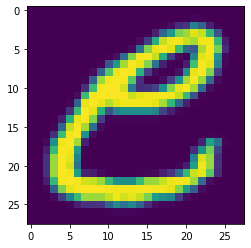

In [55]:
# Funcion para tranasformacion de vectores a matrices cuadradas
def vector2sqmatrix(vector):
    dimension=int(np.sqrt(len(vector)))
    sqm = np.zeros((dimension,dimension))
    
    for x in range(dimension):
        sqm[x]=np.array(vector[x*dimension:dimension+(x*dimension)])
    return sqm


img=vector2sqmatrix(dfim.iloc[6][1:])
imgplot = plt.imshow(img)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [64]:
# Your code here

dfimU=dfim[(dfim.e>9)&(dfim.e<37)]

X=dfimU.drop(columns='e')
y=dfimU.e
X_train, X_test, y_train, y_test=TTS(X,y,test_size=0.2, random_state=1)

In [65]:
from sklearn.naive_bayes import GaussianNB as GNB

In [66]:
gnb=GNB()
gnb.fit(X_train,y_train)

train_score=gnb.score(X_train, y_train)
test_score=gnb.score(X_test, y_test)

print (train_score, test_score)

0.5023303398885984 0.4992421946044256


In [77]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [79]:
dtc=DTC()
dtc.fit(X_train,y_train)

train_score=dtc.score(X_train, y_train)
test_score=dtc.score(X_test, y_test)

print (train_score, test_score)

1.0 0.7253713246438315


In [74]:
from lightgbm import LGBMClassifier as LGBMC

In [75]:
lgbmc=LGBMC()
lgbmc.fit(X_train,y_train)

train_score=lgbmc.score(X_train, y_train)
test_score=lgbmc.score(X_test, y_test)

print (train_score, test_score)

1.0 0.9045165201576235


* Try to do the same thing with lowercases.

In [80]:
# Your code here
dfiml=dfim[(dfim.e>36)]

X=dfiml.drop(columns='e')
y=dfiml.e
X_train, X_test, y_train, y_test=TTS(X,y,test_size=0.2, random_state=1)

In [81]:
gnb=GNB()
gnb.fit(X_train,y_train)

train_score=gnb.score(X_train, y_train)
test_score=gnb.score(X_test, y_test)

print (train_score, test_score)

0.4345366909305528 0.4233720243950423


In [83]:
dtc=DTC()
dtc.fit(X_train,y_train)

train_score=dtc.score(X_train, y_train)
test_score=dtc.score(X_test, y_test)

print (train_score, test_score)

1.0 0.730277395239032


In [84]:
lgbmc=LGBMC()
lgbmc.fit(X_train,y_train)

train_score=lgbmc.score(X_train, y_train)
test_score=lgbmc.score(X_test, y_test)

print (train_score, test_score)

1.0 0.8876647649026166


* Try to do the same thing with numbers.

In [85]:
# Your code here
dfimn=dfim[(dfim.e<10)]

X=dfimn.drop(columns='e')
y=dfimn.e
X_train, X_test, y_train, y_test=TTS(X,y,test_size=0.2, random_state=1)

In [86]:
gnb=GNB()
gnb.fit(X_train,y_train)

train_score=gnb.score(X_train, y_train)
test_score=gnb.score(X_test, y_test)

print (train_score, test_score)

0.6490913799801442 0.6614295580110497


In [87]:
dtc=DTC()
dtc.fit(X_train,y_train)

train_score=dtc.score(X_train, y_train)
test_score=dtc.score(X_test, y_test)

print (train_score, test_score)

1.0 0.8890711325966851


In [90]:
lgbmc=LGBMC()
lgbmc.fit(X_train,y_train)

train_score=lgbmc.score(X_train, y_train)
test_score=lgbmc.score(X_test, y_test)

print (train_score, test_score)

0.999956835153451 0.975828729281768
